In [1]:
import osh5def
import osh5vis
import osh5io
from pathlib import Path

import matplotlib.pyplot as plt
# # Set the default font size for axis labels
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
# Set the default font size for tick labels
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16


In [5]:
data_dir = Path('/home/dschneidinger/MagShockZ/simulations/raw_data/magshockz-v2.0.2d/MS')
# data_dir = Path('/home/dschneidinger/osiris/decks/cuda/MS')
def look_through_data(data_dir:Path, diagnostics:dict):
    for item in data_dir.rglob(''):
        item = item.relative_to(data_dir)
        dirs = item.as_posix().split('/')
        if len(dirs) > 1:
            diagnostics[item.as_posix()] = item.as_posix()

diagnostics = {}
look_through_data(data_dir, diagnostics)

print(diagnostics["DENSITY/Aluminum/charge"])

DENSITY/Aluminum/charge


In [6]:
from matplotlib.animation import FuncAnimation
from IPython import display

import matplotlib.pyplot as plt

# Function to update the plot
fig = plt.figure()

# Function to update the plot
fig, ax = plt.subplots()

def update(frame):
    plt.clf()
    c = osh5io.read_h5(f'{data_dir / diagnostics["DENSITY/Magnesium/charge"]}/charge-Magnesium-{frame:06d}.h5')
    # c = osh5io.read_h5(f'{data_dir / diagnostics["DENSITY/electrons/charge"]}/charge-electrons-{frame:06d}.h5')
    # c = osh5io.read_h5(f'{data_dir}/FLD/b3/b3-{frame:06d}.h5')

    # c = osh5io.read_h5(f'{data_dir / diagnostics["UDIST/Aluminum/uth2"]}/uth2-Aluminum-{frame:06d}.h5')
    # c = osh5io.read_h5(f'{data_dir / diagnostics["FLD/e2"]}/e2-{frame:06d}.h5')
    osh5vis.osplot(c,cmap = 'hot')
        
    print(f'Frame {frame}')

# Create the animation
ani = FuncAnimation(fig, update,frames=1,interval=100)
# Ensure all frames use the same colorbar as the first frame
video = ani.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()
# Ensure ffmpeg is available

# ani.save('charge-Aluminum.mp4', writer='ffmpeg', fps=20)

Frame 0
Frame 0


<Figure size 640x480 with 0 Axes>

(<matplotlib.image.AxesImage at 0x763ae33cb230>,
 <matplotlib.colorbar.Colorbar at 0x763ae33cbc50>)

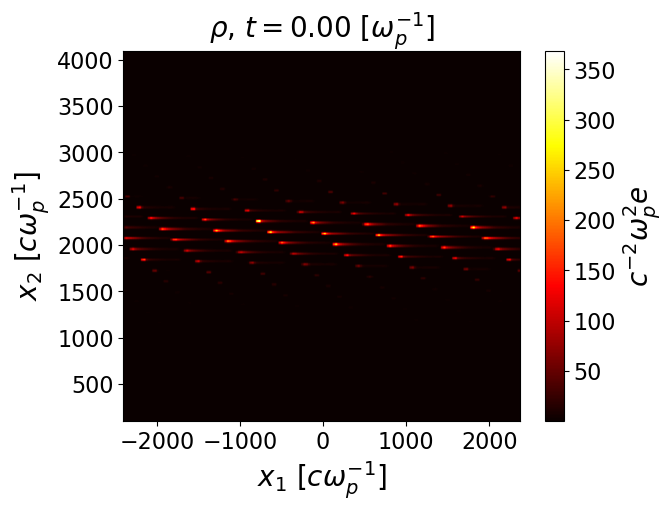

In [13]:
c = osh5io.read_h5(f'{data_dir / diagnostics["DENSITY/Magnesium/charge"]}/charge-Magnesium-{0:06d}.h5')
# osh5vis.osplot(c,cmap = 'hot',title = r"$Zn_i$" + f", t = {round((c.run_attrs['TIME']/4781.497)[0],3)}" +  r"$\omega_{ci}^{-1}$",vmax = 9)
osh5vis.osplot(c,cmap = 'hot')

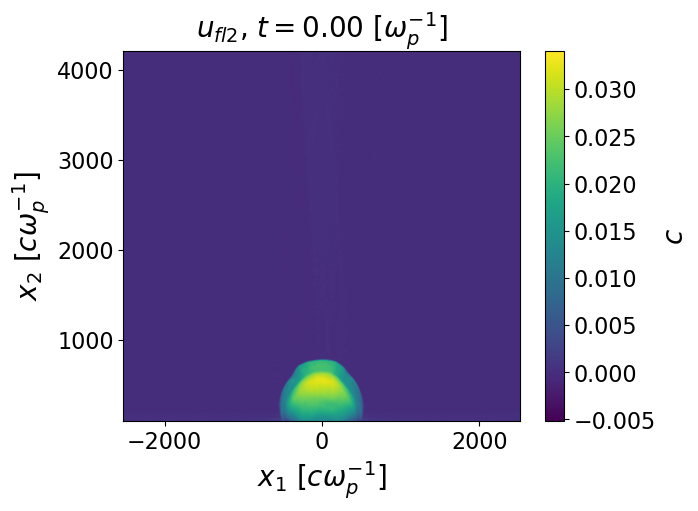

In [25]:
c = osh5io.read_h5(f'{data_dir}/UDIST/Aluminum/ufl2/ufl2-Aluminum-000000.h5')
plot = osh5vis.osplot(c)


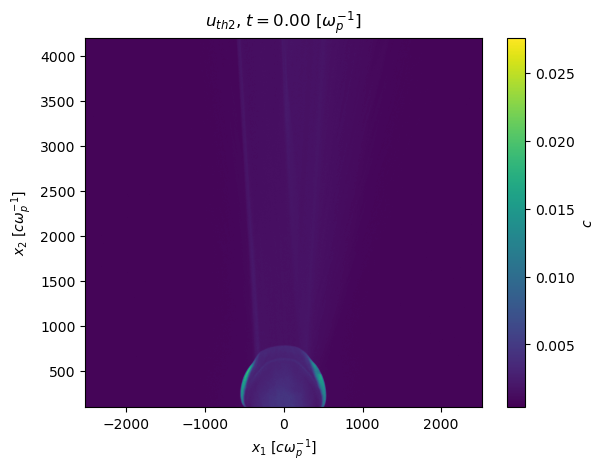

In [10]:
c = osh5io.read_h5(f'{data_dir}/UDIST/Aluminum/uth2/uth2-Aluminum-000000.h5')
plot = osh5vis.osplot(c)
